In [1]:
import sys 
import os 
project_root = os.path.abspath(os.path.join(os.getcwd(), "..")) 
sys.path.insert(0, project_root)

In [2]:
from pathlib import Path
import pandas as pd
import numpy as np

In [3]:
TOP = Path.cwd().as_posix().replace('notebooks','')

In [4]:
raw_dir = Path(TOP) / 'data' /'raw'

In [7]:
from ttc_nccrp.chm.chm import MoleculeProcessor

In [8]:
lri = pd.read_csv(raw_dir/'LRI_TTC_updated_180719.csv')

In [9]:
lri.columns

Index(['casrn', 'DTXSID', 'name', 'smiles', 'daily_intake', 'iris_noael',
       'tox_cast_oed_5th', 'tox_cast_oed_median', 'tox_tree_ttc', 'ttc_class',
       'kroes_decision', 'small_httk', 'large_cerapp', 'mark_ttc_class',
       'reason_for_NA', 'old_ttc_class'],
      dtype='object')

In [10]:
lri = (lri
 .rename(columns = {'DTXSID':'dtxsid'})
)

In [11]:
exclusions = lri[lri.mark_ttc_class == 'NA for TTC']

In [12]:
exclusions.head()

,casrn,dtxsid,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,ttc_class,kroes_decision,small_httk,large_cerapp,mark_ttc_class,reason_for_NA,old_ttc_class
8,3520-42-1,DTXSID7021235,C.I. Acid Red 52,[Na+].CCN(CC)c1cc2[o+]c3cc(N(CC)CC)c(C)cc3c(-c...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
10,16423-68-0,DTXSID7021233,FD&C Red 3,[Na+].[Na+].[O-]C(=O)c1ccccc1-c1c2cc(I)c([O-])...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
13,4474-24-2,DTXSID2041705,C.I. Acid Blue 80,[Na+].[Na+].Cc1cc(C)c(c(C)c1Nc1ccc(Nc2c(C)cc(C...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
22,518-47-8,DTXSID9025328,Fluorescein sodium,[Na+].[Na+].[O-]c1ccc2c(Oc3cc([O-])ccc3C22OC(=...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
25,3567-66-6,DTXSID1044562,D&C Red No. 33,[Na+].[Na+].Nc1cc(cc2cc(c(N=Nc3ccccc3)c(O)c12)...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC


In [13]:
exclusions

,casrn,dtxsid,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,ttc_class,kroes_decision,small_httk,large_cerapp,mark_ttc_class,reason_for_NA,old_ttc_class
8,3520-42-1,DTXSID7021235,C.I. Acid Red 52,[Na+].CCN(CC)c1cc2[o+]c3cc(N(CC)CC)c(C)cc3c(-c...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
10,16423-68-0,DTXSID7021233,FD&C Red 3,[Na+].[Na+].[O-]C(=O)c1ccccc1-c1c2cc(I)c([O-])...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
13,4474-24-2,DTXSID2041705,C.I. Acid Blue 80,[Na+].[Na+].Cc1cc(C)c(c(C)c1Nc1ccc(Nc2c(C)cc(C...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
22,518-47-8,DTXSID9025328,Fluorescein sodium,[Na+].[Na+].[O-]c1ccc2c(Oc3cc([O-])ccc3C22OC(=...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
25,3567-66-6,DTXSID1044562,D&C Red No. 33,[Na+].[Na+].Nc1cc(cc2cc(c(N=Nc3ccccc3)c(O)c12)...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40921,62-74-8,DTXSID8024311,Sodium fluoroacetate,[Na+].[O-]C(=O)CF,99,0.05,NaN,NaN,0.001500,Cramer Class III,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
41449,NOCAS_860215,DTXSID30860215,CERAPP_20203,OCC(OP(O)=O)OP(O)=O,99,NaN,NaN,NaN,0.030000,Cramer Class I,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,OP/Carbamate
42102,506-64-9,DTXSID9024306,Silver cyanide,[Ag+].[C-]#N,99,55.70,NaN,NaN,0.001500,Cramer Class III,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC
43414,1111-67-7,DTXSID0034481,Copper thiocyanate,[Cu+].[S-]C#N,99,NaN,NaN,NaN,0.001500,Cramer Class III,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC


In [14]:
molprocess = MoleculeProcessor()

In [15]:
mytest = molprocess.add_chemical('DTXSID2057990', 'CCOP(O)=O')

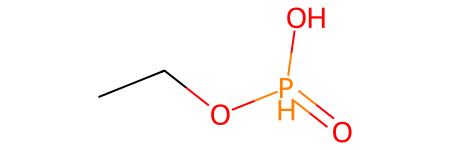

In [16]:
mytest['DTXSID2057990']

In [18]:
molprocess.has_metal_atom()

AttributeError: 'dict' object has no attribute 'GetAtoms'

In [35]:
#exclusions_df = molprocess.add_chemicals_from_dataframe(exclusions, return_format = '_df')

In [30]:
exclusions_df.head()

,casrn,dtxsid,name,smiles,daily_intake,iris_noael,tox_cast_oed_5th,tox_cast_oed_median,tox_tree_ttc,ttc_class,kroes_decision,small_httk,large_cerapp,mark_ttc_class,reason_for_NA,old_ttc_class,mol
8,3520-42-1,DTXSID7021235,C.I. Acid Red 52,[Na+].CCN(CC)c1cc2[o+]c3cc(N(CC)CC)c(C)cc3c(-c...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC,<rdkit.Chem.rdchem.Mol object at 0x00000196E28...
10,16423-68-0,DTXSID7021233,FD&C Red 3,[Na+].[Na+].[O-]C(=O)c1ccccc1-c1c2cc(I)c([O-])...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC,<rdkit.Chem.rdchem.Mol object at 0x00000196E28...
13,4474-24-2,DTXSID2041705,C.I. Acid Blue 80,[Na+].[Na+].Cc1cc(C)c(c(C)c1Nc1ccc(Nc2c(C)cc(C...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC,<rdkit.Chem.rdchem.Mol object at 0x00000196E28...
22,518-47-8,DTXSID9025328,Fluorescein sodium,[Na+].[Na+].[O-]c1ccc2c(Oc3cc([O-])ccc3C22OC(=...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC,<rdkit.Chem.rdchem.Mol object at 0x00000196E28...
25,3567-66-6,DTXSID1044562,D&C Red No. 33,[Na+].[Na+].Nc1cc(cc2cc(c(N=Nc3ccccc3)c(O)c12)...,99,NaN,NaN,NaN,0.000003,Genotoxicity Alert,Risk assessment requires compound-specific tox...,NO,YES,NA for TTC,Yes to Q1,NA for TTC,<rdkit.Chem.rdchem.Mol object at 0x00000196E28...
